Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import LogisticRegression

Loading The Dataset

In [2]:
df=pd.read_csv("C://Users//USER//Downloads//WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Exploratory Data Analaysis

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking if the dataset contains null values

In [7]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

By the Above result we can say that dataset have 0 null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

By the above info we can clearly say that we have several categorical columns they are
- Attrition                 
- BusinessTravel            
- Department
- EducationField            
- Gender                    
- JobRole
- MaritalStatus               
- Over18                      
- OverTime                                       

In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [12]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [13]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [15]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [16]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [17]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [18]:
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

By the Above Analaysis we can perform label encoder for the following columns:
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- MartialStatus
- Over18
- OverTime

    And we need to perform one hot encoding for the column **'JobRole'**

Performing Label Encoder for above columns

In [19]:
le=LabelEncoder()
list1=df[['Attrition','BusinessTravel','Department','EducationField','Gender','MaritalStatus','Over18','OverTime']]
for i in list1:
  df[i]=le.fit_transform(df[i])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

you can see that all the above columns are converted into numerical values and we need to do one hot encoding for the remaining column i.e, **'JobRole'**

performing one hot encoder fr the column JobRole

In [21]:
dummies=pd.get_dummies(df['JobRole'])

In [22]:
dummies

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1465,False,False,True,False,False,False,False,False,False
1466,True,False,False,False,False,False,False,False,False
1467,False,False,False,False,True,False,False,False,False
1468,False,False,False,False,False,False,False,True,False


In [23]:
df=pd.concat([df,dummies],axis=1)

In [24]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,2,1102,2,1,2,1,1,1,...,5,False,False,False,False,False,False,False,True,False
1,49,0,1,279,1,8,1,1,1,2,...,7,False,False,False,False,False,False,True,False,False
2,37,1,2,1373,1,2,2,4,1,4,...,0,False,False,True,False,False,False,False,False,False
3,33,0,1,1392,1,3,4,1,1,5,...,0,False,False,False,False,False,False,True,False,False
4,27,0,2,591,1,2,1,3,1,7,...,2,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,False,False,True,False,False,False,False,False,False
1466,39,0,2,613,1,6,1,3,1,2062,...,7,True,False,False,False,False,False,False,False,False
1467,27,0,2,155,1,4,3,1,1,2064,...,3,False,False,False,False,True,False,False,False,False
1468,49,0,1,1023,2,2,3,3,1,2065,...,8,False,False,False,False,False,False,False,True,False


so we have converted all the categorical columns into numerical columns now

Dropping the column JobRole for avoiding confusion

In [25]:
df=df.drop('JobRole',axis=1)

Dividing the data into target and features

In [26]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

Splitting the data into training and testing

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
len(X_train),len(X_test)

(1176, 294)

Traning the model

In [47]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [48]:
lr.score(X_test,y_test)

0.8979591836734694

In [49]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
rf.score(X_test,y_test)

0.8775510204081632

In [51]:
from xgboost import XGBClassifier

In [52]:
xc=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1)
xc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
xc.score(X_test,y_test)

0.8741496598639455

Accuracy is still low rightt?? so lets do tuning and check them

In [54]:
models={
    'logistic_regression':LogisticRegression(),
    'random_forest':RandomForestClassifier(),
    'xgboost':XGBClassifier()
}

In [55]:
params={
    'logistic_regression':
    {
        'solver':['lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter':[100,150,200,250]
    },
    'random_forest':
    {
        'n_estimators':[100,150,200,250],
        'criterion':['gini','entropy','log_loss']
    },
    'xgboost':
    {
        'n_estimators':[100,150,200,250],
        'max_depth':[3,5],
        'learning_rate':[0.01,0.001,0.1]
    }
}

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
import warnings
warnings.filterwarnings('ignore')
for name,model in models.items():
  res=GridSearchCV(
      estimator=model,
      param_grid=params[name],
      cv=5,
      scoring='accuracy',
  )
 res.fit(X_train,y_train)

In [59]:
res.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
res.best_score_

0.8579985575189326

In [61]:
res.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [62]:
res.best_index_

16

In [63]:
res.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [64]:
from sklearn.metrics import accuracy_score,r2_score,f1_score,roc_auc_score

In [65]:
y_pred=xc.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.8741496598639455

In [67]:
r2_score(y_test,y_pred)

-0.0938159879336351

In [68]:
f1_score(y_test,y_pred)

0.32727272727272727

In [69]:
roc_auc_score(y_test,y_pred)

0.6016591251885369

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[248,   7],
       [ 30,   9]], dtype=int64)

<Axes: >

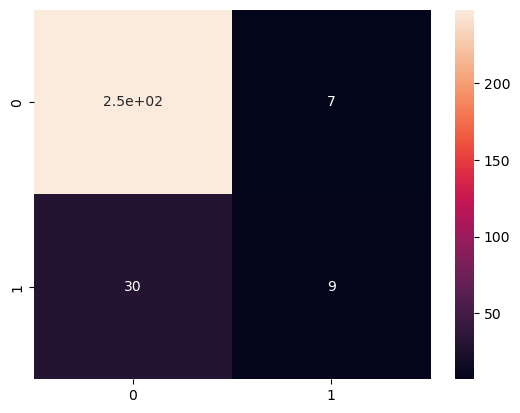

In [71]:
sns.heatmap(cm,annot=True)

checking for class imbalance

In [72]:
y_test.value_counts(normalize=True)

Attrition
0    0.867347
1    0.132653
Name: proportion, dtype: float64

“Because only about 13% of employees left in the historical data, we need to evaluate with metrics beyond accuracy, focusing on F1-score, recall, and ROC-AUC to ensure we properly identify employees at risk.”

Checking classification report

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.56      0.23      0.33        39

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294



Checking Feature Importance

In [77]:
importance=xc.feature_importances_

In [78]:
importance

array([0.02640352, 0.02023212, 0.01857825, 0.03640014, 0.02073235,
       0.01949044, 0.02477672, 0.        , 0.01895828, 0.02039495,
       0.01592634, 0.01711936, 0.02888813, 0.08552771, 0.02295894,
       0.04105318, 0.0294444 , 0.01692557, 0.03230368, 0.        ,
       0.09782709, 0.01417293, 0.        , 0.02039637, 0.        ,
       0.04773112, 0.04020563, 0.02085728, 0.02188133, 0.03059908,
       0.02444091, 0.02606072, 0.01983642, 0.00980399, 0.        ,
       0.0190102 , 0.        , 0.01618194, 0.        , 0.02904379,
       0.04395655, 0.02188054], dtype=float32)

In [79]:
features = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)


In [80]:
print(feat_imp)

                      Feature  Importance
20                   OverTime    0.097827
13                   JobLevel    0.085528
25           StockOptionLevel    0.047731
40            Sales Executive    0.043957
15              MaritalStatus    0.041053
26          TotalWorkingYears    0.040206
3                  Department    0.036400
18         NumCompaniesWorked    0.032304
29             YearsAtCompany    0.030599
16              MonthlyIncome    0.029444
39         Research Scientist    0.029044
12             JobInvolvement    0.028888
0                         Age    0.026404
31    YearsSinceLastPromotion    0.026061
6              EducationField    0.024777
30         YearsInCurrentRole    0.024441
14            JobSatisfaction    0.022959
28            WorkLifeBalance    0.021881
41       Sales Representative    0.021881
27      TrainingTimesLastYear    0.020857
4            DistanceFromHome    0.020732
23   RelationshipSatisfaction    0.020396
9     EnvironmentSatisfaction    0

Based on this JobLevel has more impact

Converting into pickle file

In [81]:
final_model = res.best_estimator_

In [82]:
import joblib
joblib.dump(final_model, "Employee_Attrition_model.pkl")
print("✅ Model saved as Employee_Attrition_model.pkl")

✅ Model saved as Employee_Attrition_model.pkl
